# TODO(after verifying whether there are repeatable forces acting along activation fronts): Studying activation front curvature
Tim Tyree<br>
5.3.2021

In [1]:
from lib.my_initialization import *

In [ ]:
#TODO: import example and compute arclen_values
#TODO: interpolate txt to contour nodes
#TODO: get a sample activation front identified in terms of arcVc_values
#TODO: plot curvature versus sigma at t=900
#TODO: see how ^that evolves with time

- ...TODO: come up with some simple rules for curvature versus time
- ...TODO: use intersections to compute interactions between activation fronts

In [2]:
#dev curvature of line
import numpy as np

a = np.array([ [  0.  ,   0.  ],[  0.3 ,   0.  ],[  1.25,  -0.1 ],
              [  2.1 ,  -0.9 ],[  2.85,  -2.3 ],[  3.8 ,  -3.95],
              [  5.  ,  -5.75],[  6.4 ,  -7.8 ],[  8.05,  -9.9 ],
              [  9.9 , -11.6 ],[ 12.05, -12.85],[ 14.25, -13.7 ],
              [ 16.5 , -13.8 ],[ 19.25, -13.35],[ 21.3 , -12.2 ],
              [ 22.8 , -10.5 ],[ 23.55,  -8.15],[ 22.95,  -6.1 ],
              [ 21.35,  -3.95],[ 19.1 ,  -1.9 ]])

In [7]:
dx_dt = np.gradient(a[:, 0])
dy_dt = np.gradient(a[:, 1])
velocity = np.array([ [dx_dt[i], dy_dt[i]] for i in range(dx_dt.size)])
ds_dt = np.sqrt(dx_dt * dx_dt + dy_dt * dy_dt)
tangent = np.array([1/ds_dt] * 2).transpose() * velocity
tangent_x = tangent[:, 0]
tangent_y = tangent[:, 1]

deriv_tangent_x = np.gradient(tangent_x)
deriv_tangent_y = np.gradient(tangent_y)

dT_dt = np.array([ [deriv_tangent_x[i], deriv_tangent_y[i]] for i in range(deriv_tangent_x.size)])

length_dT_dt = np.sqrt(deriv_tangent_x * deriv_tangent_x + deriv_tangent_y * deriv_tangent_y)

normal = np.array([1/length_dT_dt] * 2).transpose() * dT_dt

d2s_dt2 = np.gradient(ds_dt)
d2x_dt2 = np.gradient(dx_dt)
d2y_dt2 = np.gradient(dy_dt)

curvature = np.abs(d2x_dt2 * dy_dt - dx_dt * d2y_dt2) / (dx_dt * dx_dt + dy_dt * dy_dt)**1.5
t_component = np.array([d2s_dt2] * 2).transpose()
n_component = np.array([curvature * ds_dt * ds_dt] * 2).transpose()

acceleration = t_component * tangent + n_component * normal

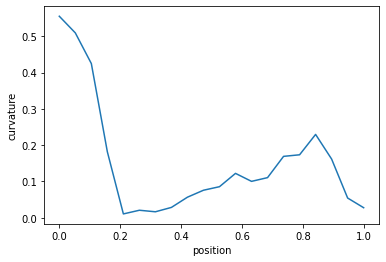

In [13]:
sigma_unitless_values=np.linspace(0,1,curvature.shape[0])
plt.plot(sigma_unitless_values,curvature)
plt.xlabel('position')
plt.ylabel('curvature')
plt.show()

NOTE: ^this curve can be made smoother by 
1. fitting a BSpline through the data points and 
1. computing the curvature as a function of derivatives of ^that BSpline fit.